In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from pycocotools.coco import COCO

## Simple EDA using OpenCV

In [4]:
import cv2
class FrameExtractor(object):
  """
    This class extracts frames from a given video
  """
  def get_frames(self, file_path):
    """   Extracts frames from a given video file   """
    try:
      vidObj = cv2.VideoCapture(file_path)
      time_interval = 100   # Get the frames at interval of 100ms
      frames, frame_count = list(), 0
      
      print(vidObj.get(cv2.CAP_PROP_FPS), vidObj.get(cv2.CAP_PROP_FRAME_COUNT))
      status, image = vidObj.read()
      while status:
        frame_count += 1
        frames.append(image)
        vidObj.set(cv2.CAP_PROP_POS_MSEC, frame_count*time_interval)
        status, image = vidObj.read()
      else:
        print("%d frames extracted." %frame_count)
      
      return frames
    except Exception as ex:
      print("Error: %s" %str(ex))
  
  def show_frames(self, file_path):
    """   Displays frames from a given video file   """
    try:
      assert os.path.isfile(file_path), "File not found"
      
      frames = self.get_frames(file_path)
      for i,image in enumerate(frames):
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.title('Frame %d' %(i+1))
        plt.show()
    
    except Exception as ex:
      print("Error: %s" %str(ex))
  
  def save_frames(self, file_path):
    """   Extracts frames from video and saves in directory   """
    try:
      assert os.path.isfile(file_path), "File not found"
      
      frames = self.get_frames(file_path)
      frames_dir = os.path.splitext(file_path)[0]+'_frames'
      if not os.path.isdir(frames_dir):
        os.mkdir(frames_dir)
      
      for i,image in enumerate(frames):
        cv2.imwrite(os.path.join(frames_dir,  'frame_%d.png'%(i+1)), image)
      
      print("Frames saved at: %s" %(frames_dir))
      
    except Exception as ex:
      print("Error: %s" %str(ex))

In [5]:
fx = FrameExtractor()

31.32785461369231 40.0
13 frames extracted.


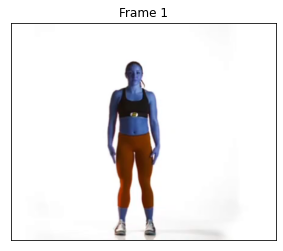

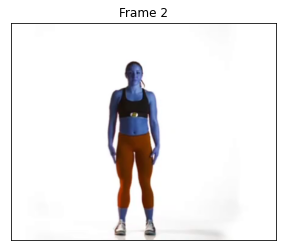

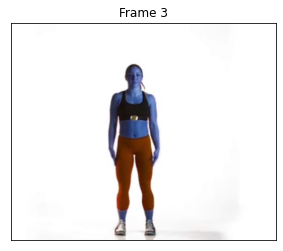

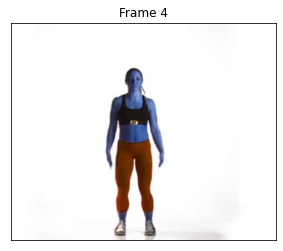

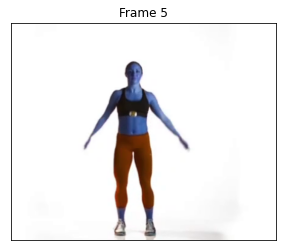

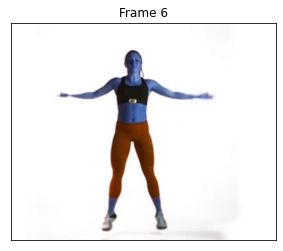

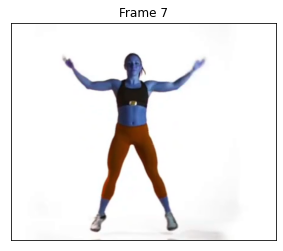

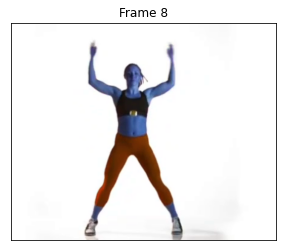

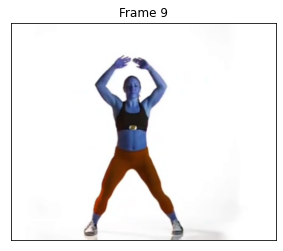

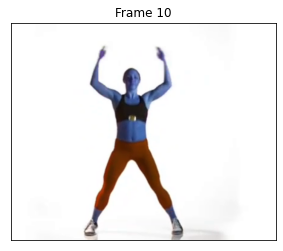

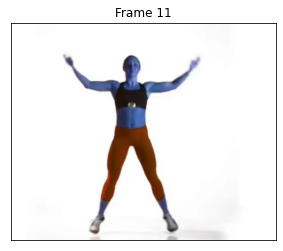

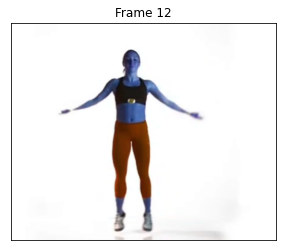

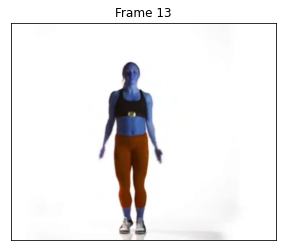

In [5]:
fx.show_frames('./resources/videos/jumping_jacks.mp4')

In [8]:
vidObj = cv2.VideoCapture('./data/videos/jumping_jacks.mp4')

In [16]:
vidObj.get(cv2.CAP_PROP_FRAME_COUNT), vidObj.get(cv2.CAP_PROP_FPS)

(40.0, 31.32785461369231)

In [15]:
vidObj.set(cv2.CAP_PROP_POS_MSEC), vidObj.get(cv2.CAP_PROP_POS_FRAMES)

(0.0, 0.0)

In [122]:
fx.save_frames('./data/videos/jumping_jacks.mp4')

33 frames extracted.
Frames saved at: ./data/videos/Jumping_Jacks_frames


In [41]:
color = cv2.imread("./data/videos/Jumping_Jacks_frames/frame_1.png", 1)

Shape:  (360, 640, 3)
AxesImage(54,36;334.8x217.44)


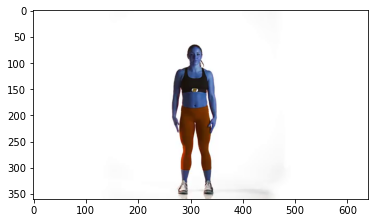

In [8]:
print("Shape: ", color.shape)
print(plt.imshow(color))

In [11]:
b,g,r = cv2.split(color)

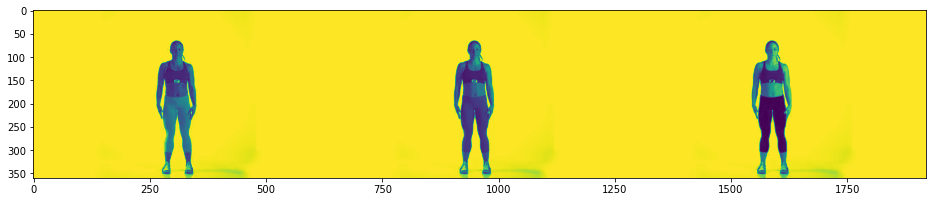

In [21]:
# Display BGR separately

plt.figure(figsize=(16, 14))
plt.imshow(np.concatenate((b,g,r), axis=1))

In [22]:
# Display HSV separately
hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)

In [23]:
h,s,v = cv2.split(hsv)
hsv_split = np.concatenate((h,s,v),axis=1)

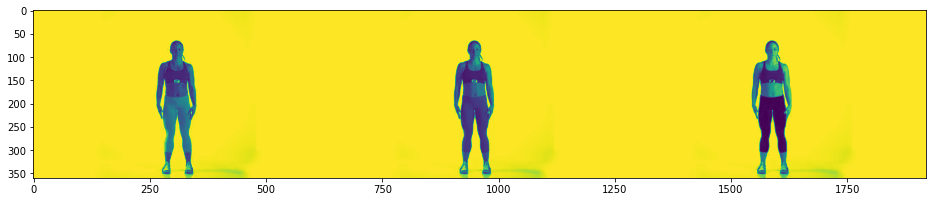

In [24]:
plt.figure(figsize=(16, 14))
plt.imshow(np.concatenate((b,g,r), axis=1))

In [24]:
color = cv2.imread("./resources/data/videos/plank.png", 1)

In [25]:
import cv2
import numpy as np
face_classifier = cv2.CascadeClassifier('./resources/models/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)

# faces = face_classifier.detectMultiScale(gray, 1.0485258, 6)
faces = face_classifier.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=6
                                         ,flags = cv2.CASCADE_SCALE_IMAGE)

if faces is ():
    print("No faces found")

for (x,y,w,h) in faces:
    cv2.rectangle(color, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', color)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-25-1cdb9805c02f>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [23]:
faces

array([[681,  93,  42,  42]], dtype=int32)

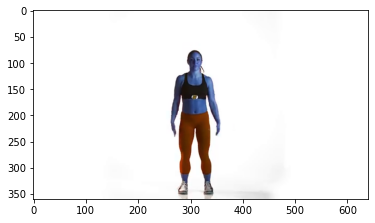

In [28]:
# cv2.imshow("Faces Detected", image)
# cv2.waitKey(0)
plt.imshow(image)
plt.show()

In [3]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 640)
# cap.set(cv2.CAP_PROP_BRIGHTNESS, 100)
# cap.set(cv2.CAP_PROP_EXPOSURE, 250)

while cap.isOpened():
  success, img = cap.read()
  cv2.imshow("Video", cv2.flip(img, 1))
  if cv2.waitKey(1) & 0xFF==ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2, sys, numpy, os
haar_file = './resources/haarcascade_frontalface_default.xml'
 
# All the faces data will be
#  present this folder
datasets = 'datasets' 
 
 
# These are sub data sets of folder,
# for my faces I've used my name you can
# change the label here
sub_data = 'prince'    
 
path = os.path.join(datasets, sub_data)
if not os.path.isdir(path):
    os.mkdir(path)
 
# defining the size of images
(width, height) = (130, 100)   
 
#'0' is used for my webcam,
# if you've any other camera
#  attached use '1' like this
face_cascade = cv2.CascadeClassifier(haar_file)
webcam = cv2.VideoCapture(0)
 
# The program loops until it has 30 images of the face.
count = 1
while count < 30:
    (_, im) = webcam.read()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 0), 2)
        face = gray[y:y + h, x:x + w]
        face_resize = cv2.resize(face, (width, height))
        cv2.imwrite('% s/% s.png' % (path, count), face_resize)
    count += 1
     
    cv2.imshow('OpenCV', im)
    key = cv2.waitKey(1)
    if key == 27:
        break

webcam.release()
cv2.destroyAllWindows()

In [4]:
# It helps in identifying the faces
import cv2, sys, numpy, os
size = 4
# haar_file = 'haarcascade_frontalface_default.xml'
datasets = 'datasets'
 
# Part 1: Create fisherRecognizer
print('Recognizing Face Please Be in sufficient Lights...')
 
# Create a list of images and a list of corresponding names
(images, labels, names, id) = ([], [], {}, 0)
for (subdirs, dirs, files) in os.walk(datasets):
    for subdir in dirs:
        names[id] = subdir
        subjectpath = os.path.join(datasets, subdir)
        for filename in os.listdir(subjectpath):
            path = subjectpath + '/' + filename
            label = id
            images.append(cv2.imread(path, 0))
            labels.append(int(label))
        id += 1
(width, height) = (130, 100)
 
# Create a Numpy array from the two lists above
(images, labels) = [numpy.array(lis) for lis in [images, labels]]
 
# OpenCV trains a model from the images
# NOTE FOR OpenCV2: remove '.face'
model = cv2.face.LBPHFaceRecognizer_create()
model.train(images, labels)

Recognizing Face Please Be in sufficient Lights...


In [ ]:
face_cascade = cv2.CascadeClassifier(haar_file)
webcam = cv2.VideoCapture(0)
while True:
    (_, im) = webcam.read()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 0), 2)
        face = gray[y:y + h, x:x + w]
        face_resize = cv2.resize(face, (width, height))
        # Try to recognize the face
        prediction = model.predict(face_resize)
        cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 3)
 
        if prediction[1]<500:
           cv2.putText(im, '% s - %.0f' % (names[prediction[0]], prediction[1]), (x-10, y-10), 
                       cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0))
        else:
          cv2.putText(im, 'not recognized', (x-10, y-10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0))
 
    cv2.imshow('OpenCV', im)
     
    key = cv2.waitKey(1)
    if key == 27:
        break
webcam.release()
cv2.destroyAllWindows()

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [165]:
cam = cv2.VideoCapture(0)
while cam.isOpened():
  status, frame = cam.read()
  
  cv2.imshow('Cam Feed', frame)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cam.release()
cv2.destroyAllWindows()

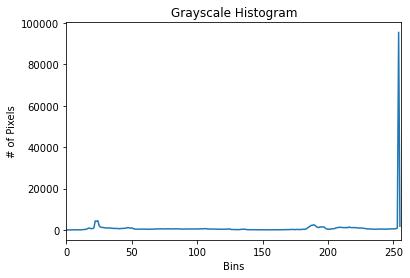

In [169]:
frame = cv2.imread("./resources/videos/plank.png")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
# hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# gray = hsv[:, :, 2]
hist = cv2.calcHist([gray], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [170]:
bright_thres = 0.5
dark_thres = 0.4
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# dark_part = cv2.inRange(gray, 0, 30)
# bright_part = cv2.inRange(gray, 225, 255)
# use histogram
# dark_pixel = np.sum(hist[:30])
# bright_pixel = np.sum(hist[220:256])
total_pixel = np.size(gray)
dark_pixel = np.sum(gray <= 30)
bright_pixel = np.sum(gray >= 225)
if dark_pixel/total_pixel > bright_thres:
  print("Face is underexposed!")
if bright_pixel/total_pixel > dark_thres:
  print("Face is overexposed!")

Face is overexposed!


In [162]:
total_pixel, dark_pixel, bright_pixel, dark_pixel/total_pixel, bright_pixel/total_pixel

(243492, 26172, 111932, 0.10748607757133705, 0.4596947743663036)

In [171]:
total_pixel, dark_pixel, bright_pixel, dark_pixel/total_pixel, bright_pixel/total_pixel

(243492, 26172, 111932, 0.10748607757133705, 0.4596947743663036)

In [32]:
bright_part.sum(), bright_pixel

(54664095, 214369)

In [33]:
dark_pixel/total_pixel, bright_pixel/total_pixel

(0.009661458333333333, 0.9304210069444444)

## TF MoveNet

In [6]:
# Import TF and TF Hub libraries.
import tensorflow as tf
import tensorflow_hub as hub

In [8]:
frames = fx.get_frames('./resources/videos/jumping_jacks.mp4')

31.32785461369231 40.0
13 frames extracted.


In [9]:
height, width = frames[8].shape[:2]

In [10]:
target_dim = 192
if height > width:
  new_height = target_dim
  new_width = int((192/height)*width)
else:
  new_width = target_dim
  new_height = int((192/width)*height)

In [11]:
new_height, new_width

(157, 192)

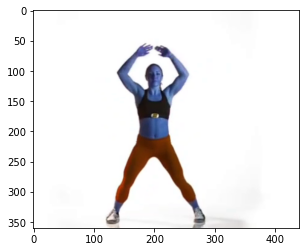

In [12]:
plt.imshow(frames[8])

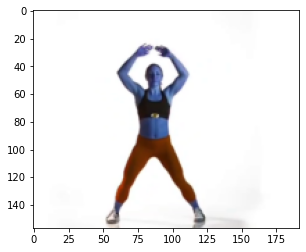

In [13]:
plt.imshow(cv2.resize(frames[8],(new_width, new_height), interpolation=cv2.INTER_AREA))

In [14]:
# import mimetypes
# mimetypes.init()
# mimetypes.guess_type('./resources/data/videos/high_knees.jpeg')

In [15]:
image = cv2.resize(frames[8],(new_width, new_height), interpolation=cv2.INTER_AREA)
# image = tf.compat.v1.image.decode_jpeg(image)
image = tf.expand_dims(image, axis=0)

In [16]:
image = tf.cast(tf.image.resize_with_pad(image, 192, 192), dtype=tf.int32)

In [17]:
model = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
movenet = model.signatures['serving_default']

In [18]:
outputs = movenet(image)

In [99]:
# Output is a [1, 1, 17, 3] tensor.
keypoints = outputs['output_0']

In [100]:
new_x, new_y = list(), list()
for y, x in tf.squeeze(keypoints)[:,:2]:
  new_x.append(x*target_dim)
  new_y.append(y*target_dim)

In [101]:
tf.squeeze(keypoints)[:,:2]

<tf.Tensor: shape=(17, 2), dtype=float32, numpy=
array([[0.3277707 , 0.45446002],
       [0.32188663, 0.47150525],
       [0.3178662 , 0.4485641 ],
       [0.3387581 , 0.48927975],
       [0.33264625, 0.42964345],
       [0.38786268, 0.51691645],
       [0.38634604, 0.39127207],
       [0.3114046 , 0.5685217 ],
       [0.31186116, 0.33032548],
       [0.23371302, 0.49269974],
       [0.23200375, 0.41597354],
       [0.5880416 , 0.4908067 ],
       [0.5896888 , 0.41273206],
       [0.7412672 , 0.5640628 ],
       [0.7330345 , 0.34708506],
       [0.85991704, 0.6228344 ],
       [0.8504233 , 0.3077408 ]], dtype=float32)>

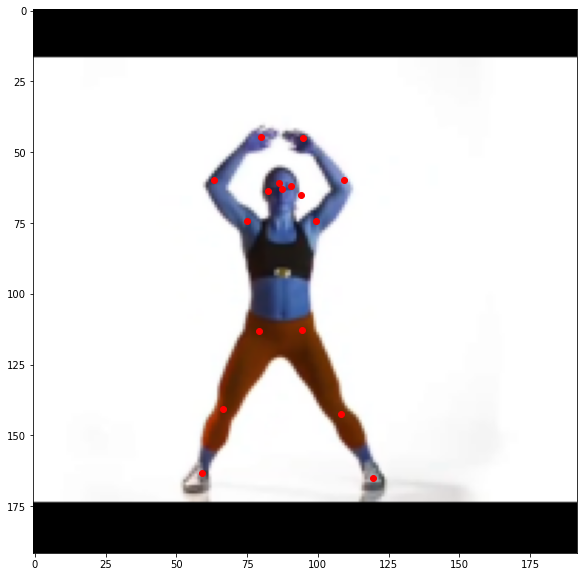

In [102]:
plt.figure(figsize=(12, 10))
# plt.imshow(image[0])
# im = plt.imread(image_name)
implot = plt.imshow(image[0])

# # put a blue dot at (10, 20)
# plt.scatter(new_x, new_y)

# put a red dot, size 40, at 2 locations:
plt.scatter(x=new_x, y=new_y, c='r')

plt.show()

In [66]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time

In [53]:
# https://tfhub.dev/google/lite-model/movenet/singlepose/

In [70]:
# model = hub.load("https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/4?lite-format=tflite")
model = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
movenet = model.signatures['serving_default']

In [78]:
count, start_time = 0, time.time()
cap = cv2.VideoCapture('./resources/videos/lunges.mp4')
while cap.isOpened():
  status, frame = cap.read()
  if not status:
    break
  image = tf.expand_dims(frame.copy(), axis=0)
  image = tf.cast(tf.image.resize_with_pad(image, 192, 192), dtype=tf.int32)
  
  outputs = movenet(image)
  
  # Draw points
  h, w, c = frame.shape
  for x, y, c in np.squeeze(outputs['output_0'].numpy()):
    cv2.circle(frame, (int(y*w), int(x*h)), 2, color= (0,255,0) if c >= 0.6 else (0,0,255))
  
  
  cv2.imshow('MoveNet Feed', frame)
  count += 1
  if time.time() - start_time >= 1:
    print(count)
    count = 0
    start_time = time.time()

  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

16
18
18
16
20


## Mediapipe

In [18]:
# https://github.com/nicknochnack/MediaPipePoseEstimation/blob/main/Media%20Pipe%20Pose%20Tutorial.ipynb

In [2]:
%matplotlib inline
import cv2
import time
import numpy as np
import mediapipe as mp
# import matplotlib.pyplot as plt

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [4]:
def light_condition(frame):
  bright_thres = 0.5
  dark_thres = 0.4
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  dark_part = cv2.inRange(gray, 0, 30)
  bright_part = cv2.inRange(gray, 225, 255)
  # use histogram
  # dark_pixel = np.sum(hist[:30])
  # bright_pixel = np.sum(hist[220:256])
  total_pixel = np.size(gray)
  dark_pixel = np.sum(dark_part > 0)
  bright_pixel = np.sum(bright_part > 0)
  if dark_pixel/total_pixel > bright_thres:
    print("Face is underexposed!")
  elif bright_pixel/total_pixel > dark_thres:
    print("Face is overexposed!")
  else:
    print("Light is okay!")

In [30]:
count, start_time = 0, time.time()
cap = cv2.VideoCapture('./resources/videos/squats.mp4')
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    status, frame = cap.read()
    if not status:
      break

    # Recolor image to RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    # Make detection
    results = pose.process(image)

    # Recolor back to BGR
    image.flags.writeable = True
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = frame.copy()

    # Render detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))               

    cv2.imshow('Mediapipe Feed', image)
    count += 1
    if time.time() - start_time >= 1:
      print(count)
      # light_condition(image)
      count = 0
      start_time = time.time()

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

  cap.release()
  cv2.destroyAllWindows()

21
26


In [7]:
results.pose_landmarks.landmark[0]

x: 0.6532687544822693
y: 0.7384592294692993
z: -2.31649112701416
visibility: 0.9982465505599976

In [51]:
results.pose_landmarks.landmark[0]

[x: 0.42108651995658875
y: 0.1593881994485855
z: -0.3349502682685852
visibility: 0.9916490912437439
, x: 0.4078238904476166
y: 0.13973119854927063
z: -0.3002830445766449
visibility: 0.9859011173248291
, x: 0.4050809144973755
y: 0.13895076513290405
z: -0.30033934116363525
visibility: 0.9858811497688293
, x: 0.40190407633781433
y: 0.1380394995212555
z: -0.30028805136680603
visibility: 0.9870814681053162
, x: 0.4042978286743164
y: 0.13960789144039154
z: -0.38996970653533936
visibility: 0.9892600178718567
, x: 0.3992956876754761
y: 0.13888324797153473
z: -0.39008915424346924
visibility: 0.9904994964599609
, x: 0.39433637261390686
y: 0.13814523816108704
z: -0.39037197828292847
visibility: 0.9906091094017029
, x: 0.365349680185318
y: 0.1447751820087433
z: -0.11469099670648575
visibility: 0.972701370716095
, x: 0.35816407203674316
y: 0.14472168684005737
z: -0.5175122618675232
visibility: 0.9911841154098511
, x: 0.41044408082962036
y: 0.17905980348587036
z: -0.2544477581977844
visibility: 0.99

In [93]:
points_list = ['LEFT_ANKLE',
 'LEFT_EAR',
 'LEFT_ELBOW',
 'LEFT_EYE',
 'LEFT_EYE_INNER',
 'LEFT_EYE_OUTER',
 'LEFT_FOOT_INDEX',
 'LEFT_HEEL',
 'LEFT_HIP',
 'LEFT_INDEX',
 'LEFT_KNEE',
 'LEFT_PINKY',
 'LEFT_SHOULDER',
 'LEFT_THUMB',
 'LEFT_WRIST',
 'MOUTH_LEFT',
 'MOUTH_RIGHT',
 'NOSE',
 'RIGHT_ANKLE',
 'RIGHT_EAR',
 'RIGHT_ELBOW',
 'RIGHT_EYE',
 'RIGHT_EYE_INNER',
 'RIGHT_EYE_OUTER',
 'RIGHT_FOOT_INDEX',
 'RIGHT_HEEL',
 'RIGHT_HIP',
 'RIGHT_INDEX',
 'RIGHT_KNEE',
 'RIGHT_PINKY',
 'RIGHT_SHOULDER',
 'RIGHT_THUMB',
 'RIGHT_WRIST']

In [95]:
mp_pose.PoseLandmark['NOSE'].value

0

In [65]:
results.pose_landmarks

landmark {
  x: 0.42108651995658875
  y: 0.1593881994485855
  z: -0.3349502682685852
  visibility: 0.9916490912437439
}
landmark {
  x: 0.4078238904476166
  y: 0.13973119854927063
  z: -0.3002830445766449
  visibility: 0.9859011173248291
}
landmark {
  x: 0.4050809144973755
  y: 0.13895076513290405
  z: -0.30033934116363525
  visibility: 0.9858811497688293
}
landmark {
  x: 0.40190407633781433
  y: 0.1380394995212555
  z: -0.30028805136680603
  visibility: 0.9870814681053162
}
landmark {
  x: 0.4042978286743164
  y: 0.13960789144039154
  z: -0.38996970653533936
  visibility: 0.9892600178718567
}
landmark {
  x: 0.3992956876754761
  y: 0.13888324797153473
  z: -0.39008915424346924
  visibility: 0.9904994964599609
}
landmark {
  x: 0.39433637261390686
  y: 0.13814523816108704
  z: -0.39037197828292847
  visibility: 0.9906091094017029
}
landmark {
  x: 0.365349680185318
  y: 0.1447751820087433
  z: -0.11469099670648575
  visibility: 0.972701370716095
}
landmark {
  x: 0.35816407203674316


In [98]:
# list(mp_pose.PoseLandmark)
for i,landmark in enumerate(results.pose_landmarks.landmark):
  if landmark.visibility < 0.6:
    name = [pt for pt in points_list if mp_pose.PoseLandmark[pt].value==i]
    print(landmark)
    print(i, name)
    print('-'*50)

x: 1.067734956741333
y: 1.3426915407180786
z: -0.7172365784645081
visibility: 0.08466226607561111

13 ['LEFT_ELBOW']
--------------------------------------------------
x: 0.24850408732891083
y: 1.5015273094177246
z: -0.35510703921318054
visibility: 0.07026415318250656

14 ['RIGHT_ELBOW']
--------------------------------------------------
x: 0.9814702868461609
y: 1.5683143138885498
z: -1.3786712884902954
visibility: 0.03567150980234146

15 ['LEFT_WRIST']
--------------------------------------------------
x: 0.2673404812812805
y: 1.6660314798355103
z: -1.2189618349075317
visibility: 0.04643400385975838

16 ['RIGHT_WRIST']
--------------------------------------------------
x: 0.9929947853088379
y: 1.6593908071517944
z: -1.5551302433013916
visibility: 0.053955648094415665

17 ['LEFT_PINKY']
--------------------------------------------------
x: 0.25342637300491333
y: 1.7534191608428955
z: -1.4288591146469116
visibility: 0.07846368849277496

18 ['RIGHT_PINKY']
-------------------------------

## Text to Speech 

In [7]:
from gtts import gTTS
mytext = 'I will go home tomorrow'
language = 'en'
myobj = gTTS(text=mytext, lang=language, slow=False)
myobj.save("welcome.mp3")
os.system("welcome.mp3")

32512

In [1]:
from playsound import playsound

In [8]:
playsound('./welcome.mp3', block=False)

In [11]:
import hashlib

In [12]:
text = "Think and wonder, wonder and think."

hash_object = hashlib.md5(text.encode())
md5_hash = hash_object.hexdigest()

In [32]:
os.mkdir('./resources/test/')

In [22]:
{file: True for file in os.listdir('./') if os.path.isfile(os.path.join('./', file))}

{'Virtual_Gym_Assistant_Experiments.ipynb': True,
 'Diploma_Project.pdf': True,
 'SmartGymAssistant2.pdf': True,
 'SmartGymAssistant.pdf': True,
 'welcome.mp3': True,
 'Project Organization_ UoH and AppliedRoots.pdf': True,
 'main.py': True}

## Exploring COCO data

In [9]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [ ]:
# initialize COCO api for instance annotations
coco=COCO(annFile)